##**PRIMER DATASET**

In [ ]:
from sklearn.datasets import make_regression
N = 1000 # samples
P = 20 # Features
X, y = make_regression(n_samples=N, n_features=P,
                       noise=0.1, random_state=42)
print(X.shape, y.shape)


(1000, 20) (1000,)


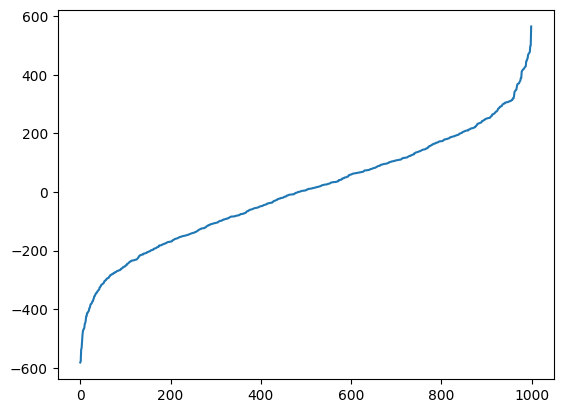

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.sort(y))
plt.show()

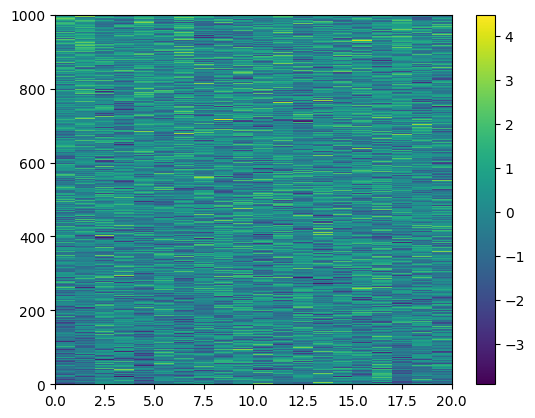

In [ ]:
ind_ = np.argsort(y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.show()

In [ ]:
def mincua_reg(X,y,lam_=1e-3): # Ajustarse(fit), opt.
  alpha = np.linalg.inv(X.T.dot(X)+lam_*np.eye(X.shape[1])).dot(X.T).dot(y)
  return alpha

[ 8.00015870e+01  9.85791489e+01  5.56725661e+00  2.42188895e-03
  8.64660571e+01 -3.94762241e-03  6.94305381e+01 -3.55913015e-04
  2.38018824e-03 -3.12018555e-03  1.86066282e+01  3.96353668e+01
  4.92664004e-04  3.10348876e+00 -4.42266205e-03  2.63864234e+01
 -2.42866192e-03  8.68824516e+01  3.51389388e-03  1.62268274e-03]


<StemContainer object of 3 artists>

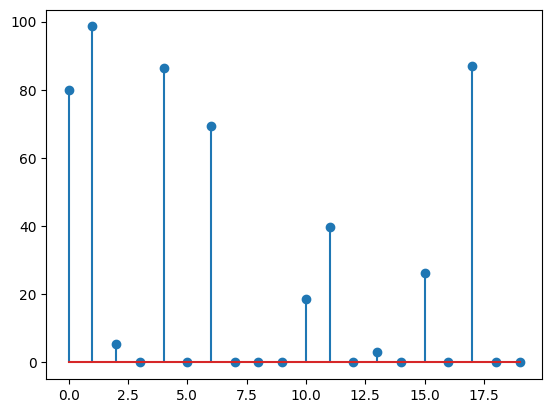

In [ ]:
alpha = mincua_reg(X,y)
print(alpha)
plt.stem(np.arange(len(alpha)),np.abs(alpha))

In [ ]:
ypred = X.dot(alpha)

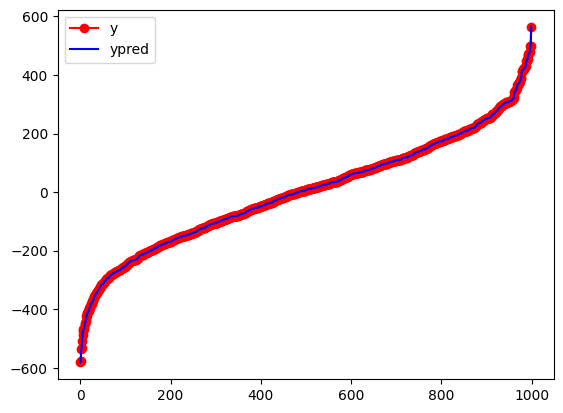

In [ ]:
plt.plot(y[ind_],c='r',marker='o',label='y')
plt.plot(ypred[ind_],c='b',label='ypred')
plt.legend()
plt.show()

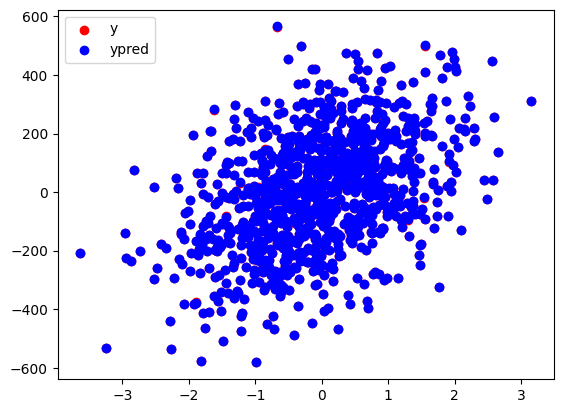

In [ ]:
plt.scatter(X[ind_,0],y[ind_], color='red', label='y')
plt.scatter(X[ind_,0],ypred[ind_], color='blue', label='ypred')
plt.legend()
plt.show()

##Calculo del gradiente descendente

Shapes: (1000, 20) (1000,)
Mean Squared Error: 0.010183269726760482
Root Mean Squared Error (RMSE): 0.10091218819726624
Alpha optimizado: [1.60528092e+00 8.07432371e+01 9.38071351e+01 5.64702514e+00
 2.47937264e-03] ...


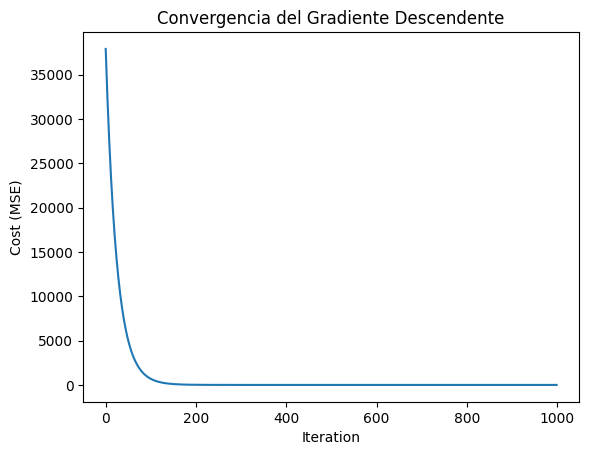

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

# ==========================
# 1) Cargar dataset con make_regression
# ==========================
N = 1000  # número de muestras
P = 20    # número de características
X, y = make_regression(n_samples=N, n_features=P,
                       noise=0.1, random_state=42)

print("Shapes:", X.shape, y.shape)

# Escalar características (muy importante para la convergencia)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Agregar columna de 1s para el término independiente (bias)
X = np.c_[np.ones(X.shape[0]), X]

# ==========================
# 2) Función de costo
# ==========================
def cost_function(X, y, alpha):
    """Calcula el error cuadrático medio"""
    N = X.shape[0]
    y_pred = X.dot(alpha)
    cost = (1/N) * np.sum((y_pred - y)**2)
    return cost

# ==========================
# 3) Gradiente
# ==========================
def calculate_gradient(X, y, alpha):
    """Calcula el gradiente de la función de costo"""
    N = X.shape[0]
    y_pred = X.dot(alpha)
    error = y_pred - y
    gradient = (2/N) * X.T.dot(error)
    return gradient

# ==========================
# 4) Gradiente Descendente
# ==========================
def gradient_descent(X, y, learning_rate, num_iterations, alpha):
    """Optimiza alpha con gradiente descendente"""
    cost_history = []
    for i in range(num_iterations):
        cost = cost_function(X, y, alpha)
        cost_history.append(cost)
        gradient = calculate_gradient(X, y, alpha)
        alpha = alpha - learning_rate * gradient
    return alpha, cost_history

# ==========================
# 5) Entrenamiento
# ==========================
alpha = np.zeros(X.shape[1])  # inicialización
learning_rate = 0.01          # ajusta si diverge
num_iterations = 1000

alpha_optimized, cost_history = gradient_descent(X, y, learning_rate, num_iterations, alpha)

# ==========================
# 6) Evaluación
# ==========================
ypred = X.dot(alpha_optimized)
mse = np.mean((ypred - y)**2)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Alpha optimizado: {alpha_optimized[:5]} ...")  # solo mostramos los primeros coef.

# ==========================
# 7) Visualización
# ==========================
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.title("Convergencia del Gradiente Descendente")
plt.show()



Como conclusión, al aplicar gradiente descendente sobre el dataset sintético generado con make_regression, se observa que el algoritmo logra converger de manera estable gracias al preprocesamiento de escalado de características, lo cual evita problemas de divergencia.

##**SEGUNDO DATASET**

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


(20640, 8) (20640,)


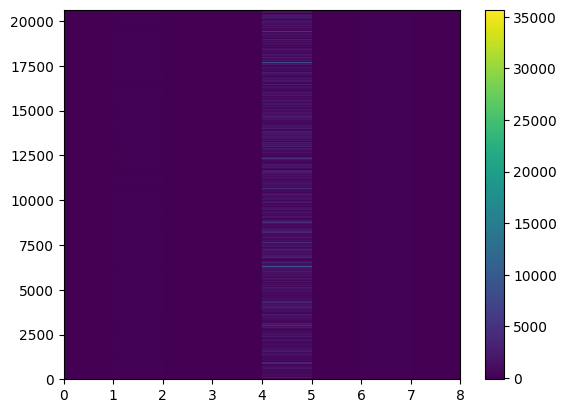

In [ ]:
X = housing.data
y = housing.target
print(X.shape, y.shape)
plt.pcolormesh(X)
plt.colorbar()
plt.show()

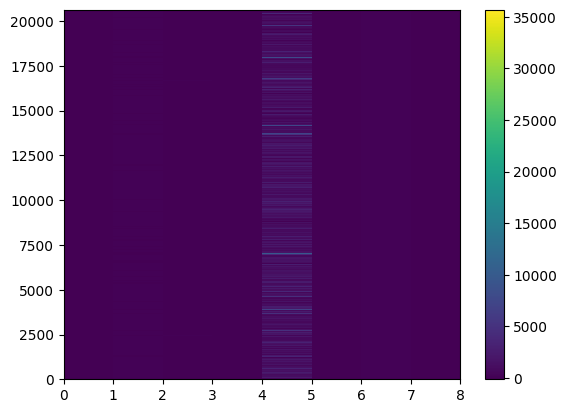

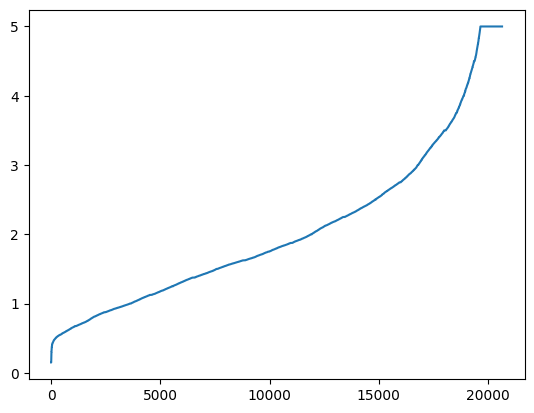

In [ ]:
ind_ =np.argsort(y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.show()
plt.plot(np.sort(y))
plt.show()

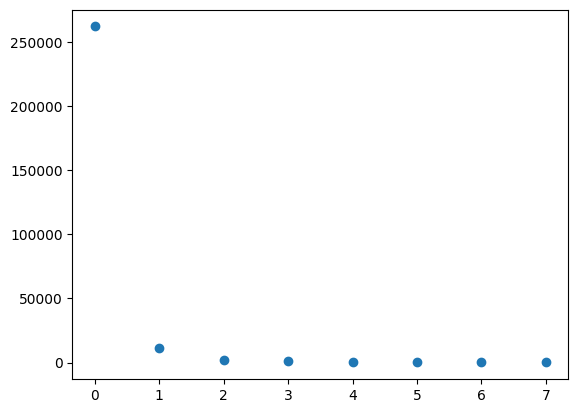

In [ ]:
U,S,Vh = np.linalg.svd(X)
plt.scatter(np.arange(len(S)),S)
plt.show()

[ 5.13515017e-01  1.56511122e-02 -1.82527999e-01  8.65097653e-01
  7.79231011e-06 -4.69928946e-03 -6.39458572e-02 -1.63827338e-02]


<StemContainer object of 3 artists>

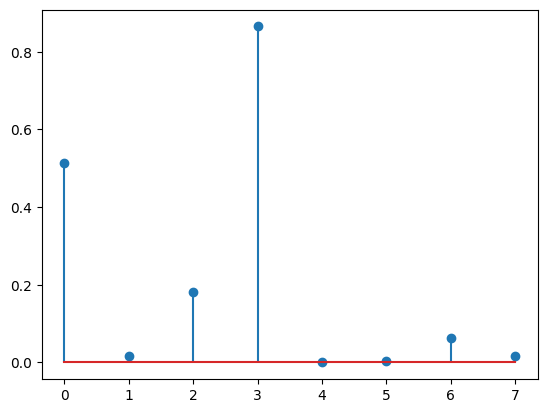

In [ ]:
alpha = mincua_reg(X,y)
print(alpha)
plt.stem(np.arange(len(alpha)),np.abs(alpha))

In [ ]:
ypred = X.dot(alpha)

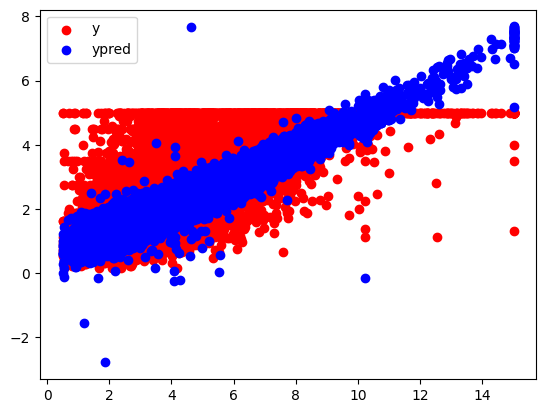

In [ ]:
plt.scatter(X[ind_,0],y[ind_], color='red', label='y')
plt.scatter(X[ind_,0],ypred[ind_], color='blue', label='ypred')
plt.legend()
plt.show()

##Calculo del gradiente descendente

Shape de X: (20640, 8)
Shape de y: (20640,)
Primeras features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Mean Squared Error (MSE): 0.530918843852846
Root Mean Squared Error (RMSE): 0.7286417801998771
Primeros coeficientes optimizados: [ 2.06855817  0.83900939  0.14736038 -0.23305152  0.25675775] ...


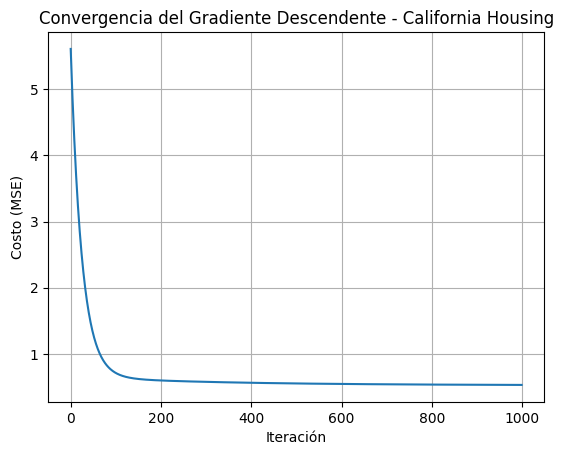

In [ ]:
# =======================================
# 1) Importar librerías necesarias
# =======================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# =======================================
# 2) Cargar dataset California Housing
# =======================================
housing = fetch_california_housing()
X, y = housing.data, housing.target
print("Shape de X:", X.shape)   # (20640, 8) → 20,640 registros, 8 features
print("Shape de y:", y.shape)   # (20640,)   → precios promedio
print("Primeras features:", housing.feature_names)

# =======================================
# 3) Escalar datos
# =======================================
# Es muy importante escalar las features porque tienen magnitudes diferentes.
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Agregar columna de unos (bias/intercepto) para el término independiente
X = np.c_[np.ones(X.shape[0]), X]

# =======================================
# 4) Definir función de costo (MSE)
# =======================================
def cost_function(X, y, alpha):
    """
    Calcula el error cuadrático medio (MSE).
    Args:
        X: matriz de features (N x P)
        y: vector objetivo (N,)
        alpha: vector de parámetros (P,)
    """
    N = X.shape[0]                     # número de muestras
    y_pred = X.dot(alpha)              # predicciones
    cost = (1/N) * np.sum((y_pred - y)**2)  # promedio de errores al cuadrado
    return cost

# =======================================
# 5) Definir gradiente
# =======================================
def calculate_gradient(X, y, alpha):
    """
    Calcula el gradiente de la función de costo respecto a alpha.
    """
    N = X.shape[0]
    y_pred = X.dot(alpha)
    error = y_pred - y
    gradient = (2/N) * X.T.dot(error)  # derivada de la MSE
    return gradient

# =======================================
# 6) Algoritmo de Gradiente Descendente
# =======================================
def gradient_descent(X, y, learning_rate, num_iterations, alpha):
    """
    Optimiza los parámetros alpha usando gradiente descendente.
    """
    cost_history = []   # para guardar el costo en cada iteración
    for i in range(num_iterations):
        cost = cost_function(X, y, alpha)   # calcular costo
        cost_history.append(cost)
        gradient = calculate_gradient(X, y, alpha)  # calcular gradiente
        alpha = alpha - learning_rate * gradient    # actualizar parámetros
    return alpha, cost_history

# =======================================
# 7) Entrenamiento del modelo
# =======================================
alpha = np.zeros(X.shape[1])   # inicializamos parámetros en 0
learning_rate = 0.01           # tasa de aprendizaje
num_iterations = 1000          # número de iteraciones

alpha_optimized, cost_history = gradient_descent(X, y, learning_rate, num_iterations, alpha)

# =======================================
# 8) Evaluación del modelo
# =======================================
ypred = X.dot(alpha_optimized)
mse = np.mean((ypred - y)**2)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Primeros coeficientes optimizados: {alpha_optimized[:5]} ...")

# =======================================
# 9) Visualización del costo en iteraciones
# =======================================
plt.plot(cost_history)
plt.xlabel("Iteración")
plt.ylabel("Costo (MSE)")
plt.title("Convergencia del Gradiente Descendente - California Housing")
plt.grid(True)
plt.show()
